In [ ]:
# PLOTTING STUFF
# Authors: Jessica Alexander, Lavanya M K, Juan Pablo Botero, Kurt Lehner, Brenda Liu
# Last Updated: 2022-07-27

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# get list of files available
path = "/Users/jessraissouni/github/motorImagery/processed_data"
filelist = os.listdir(path)

for x, file in enumerate(filelist):
    print(x, file)

0 hand_Epochs_Img_gamma1.npy
1 hand_Epochs_Img_gamma2.npy
2 hand_Epochs_Overt_beta2.npy
3 hand_Epochs_Img_beta1.npy
4 Tng_Epochs_Img_gamma1.npy
5 Tng_Epochs_Overt_gamma1.npy
6 hand_Epochs_Overt_beta3.npy
7 hand_Epochs_Overt_beta1.npy
8 hand_Epochs_Img_beta2.npy
9 Tng_Epochs_Img_gamma2.npy
10 Tng_Epochs_Overt_gamma2.npy
11 hand_Epochs_Img_beta3.npy
12 hand_Epochs_Overt_gammaH.npy
13 hand_Epochs_Overt_gamma1.npy
14 hand_Epochs_Overt_gamma2.npy
15 Tng_Epochs_Img_gammaH.npy
16 Tng_Epochs_Overt_gammaH.npy
17 hand_Epochs_Img_gammaH.npy
18 Tng_Epochs_Img_beta3.npy
19 Tng_Epochs_Overt_beta1.npy
20 Tng_Epochs_Img_beta2.npy
21 Tng_Epochs_Overt_beta2.npy
22 Tng_Epochs_Overt_beta3.npy
23 Tng_Epochs_Img_beta1.npy


In [3]:
# organize specific files for plotting (load data, select channels, average across epochs)
def fileprep(fileidx, chans, path):
    dat = np.load(path + '/' + filelist[fileidx])
    dat_chans = dat[:,chans,:]
    dat_chans_avg = np.mean(dat_chans, axis=0)
    
    return dat_chans_avg

s1_hand27_beta1_overt = fileprep(7, 27, path)
s1_hand27_gammaH_overt = fileprep(12, 27, path)
s1_hand27_beta1_imag = fileprep(3, 27, path)
s1_hand27_gammaH_imag = fileprep(17, 27, path)

s1_hand35_beta1_overt = fileprep(7, 35, path)
s1_hand35_gammaH_overt = fileprep(12, 35, path)
s1_hand35_beta1_imag = fileprep(3, 35, path)
s1_hand35_gammaH_imag = fileprep(17, 35, path)

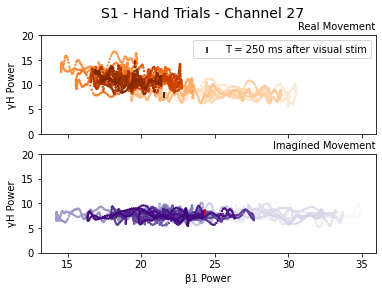

In [5]:
# plot beta1 v gammaH for both real and imagined conditions for S1+Hand+Electrode 27
oranges = plt.cm.get_cmap('Oranges', 256)
z = oranges(np.linspace(0,1,4001))
purples = plt.cm.get_cmap('Purples', 256)
w = purples(np.linspace(0,1,4001))

fig, axs = plt.subplots(2, 1, sharex='col')

axs[0].scatter(s1_hand27_beta1_overt, s1_hand27_gammaH_overt, c=z, s=2)
axs[1].scatter(s1_hand27_beta1_imag, s1_hand27_gammaH_imag, c=w, s=2)
markerovert = axs[0].scatter(s1_hand27_beta1_overt[1250], s1_hand27_gammaH_overt[1250], c='black', marker='|')
markerimag = axs[1].scatter(s1_hand27_beta1_imag[1250], s1_hand27_gammaH_imag[1250], c='red', marker='|')
axs[0].set_ylim(0, 20)
axs[1].set_ylim(0, 20)

fig.suptitle("S1 - Hand Trials - Channel 27", fontsize=14)
axs[0].set_title("Real Movement", fontsize=10, loc='right')
axs[1].set_title("Imagined Movement", fontsize=10, loc='right')

axs[1].set_xlabel(str(chr(946)+'1 Power'))
axs[0].set_ylabel(str(chr(947)+'H Power'))
axs[1].set_ylabel(str(chr(947)+'H Power'))

axs[0].legend([markerovert], ['T = 250 ms after visual stim'], loc='upper right')

plt.show()
fig.savefig("BetavGamma_S1Hand27.png")

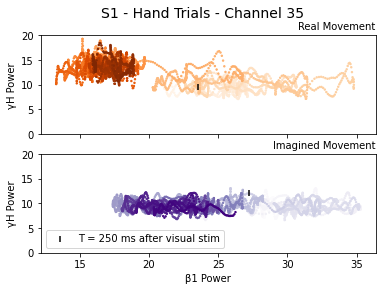

In [6]:
# plot beta1 v gammaH for both real and imagined conditions for S1+Hand+Electrode 35
oranges = plt.cm.get_cmap('Oranges', 256)
z = oranges(np.linspace(0,1,4001))
purples = plt.cm.get_cmap('Purples', 256)
w = purples(np.linspace(0,1,4001))

fig, axs = plt.subplots(2, 1, sharex='col')

axs[0].scatter(s1_hand35_beta1_overt, s1_hand35_gammaH_overt, c=z, s=2)
axs[1].scatter(s1_hand35_beta1_imag, s1_hand35_gammaH_imag, c=w, s=2)
markerovert = axs[0].scatter(s1_hand35_beta1_overt[1250], s1_hand35_gammaH_overt[1250], c='black', marker='|')
markerimag = axs[1].scatter(s1_hand35_beta1_imag[1250], s1_hand35_gammaH_imag[1250], c='black', marker='|')
axs[0].set_ylim(0, 20)
axs[1].set_ylim(0, 20)

fig.suptitle("S1 - Hand Trials - Channel 35", fontsize=14)
axs[0].set_title("Real Movement", fontsize=10, loc='right')
axs[1].set_title("Imagined Movement", fontsize=10, loc='right')

axs[1].set_xlabel(str(chr(946)+'1 Power'))
axs[0].set_ylabel(str(chr(947)+'H Power'))
axs[1].set_ylabel(str(chr(947)+'H Power'))

axs[1].legend([markerovert], ['T = 250 ms after visual stim'], loc='lower left')

plt.show()
fig.savefig("BetavGamma_S1Hand35.png")